# Importing Libraries and Setting Up Environment

In [32]:
# أساسي
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Encoding & Preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error

# Sampling / Imbalance Handling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

# Stats / Distributions
from scipy.stats import randint, uniform

# Load Data

In [34]:
df = pd.read_csv('StudentPerformanceFactors.csv')

# number of rows and columns

In [36]:
df.shape

(6607, 20)

# Columns in dataset

In [38]:
df.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

# Print first 5 rows

In [40]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Print Last 5 rows

In [42]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


# Number of unique values in each column

In [44]:
for col in df.columns:
    print(col , ":" , df[col].nunique())

Hours_Studied : 41
Attendance : 41
Parental_Involvement : 3
Access_to_Resources : 3
Extracurricular_Activities : 2
Sleep_Hours : 7
Previous_Scores : 51
Motivation_Level : 3
Internet_Access : 2
Tutoring_Sessions : 9
Family_Income : 3
Teacher_Quality : 3
School_Type : 2
Peer_Influence : 3
Physical_Activity : 7
Learning_Disabilities : 2
Parental_Education_Level : 3
Distance_from_Home : 3
Gender : 2
Exam_Score : 45


# Information about the data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Describe data

In [48]:
df.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


# Min and Max in Numerical Columns

In [50]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    print(col , "min" , df[col].min() , "max" , df[col].max())

Hours_Studied min 1 max 44
Attendance min 60 max 100
Sleep_Hours min 4 max 10
Previous_Scores min 50 max 100
Tutoring_Sessions min 0 max 8
Physical_Activity min 0 max 6
Exam_Score min 55 max 101


# Handle Duplicates

In [52]:
df.duplicated().sum()

0

# check if the data is null and count the number of nulls

In [54]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

# Percentage of Nulls in each Column

In [56]:
df.isnull().sum() / len(df) *100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

# Drop Nulls

In [58]:
df.dropna(inplace=True)

In [59]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# visualization

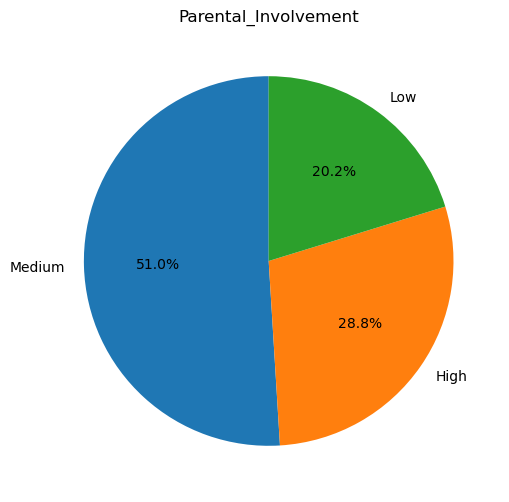

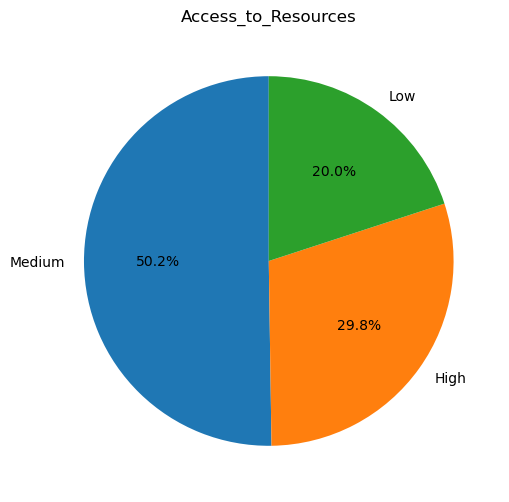

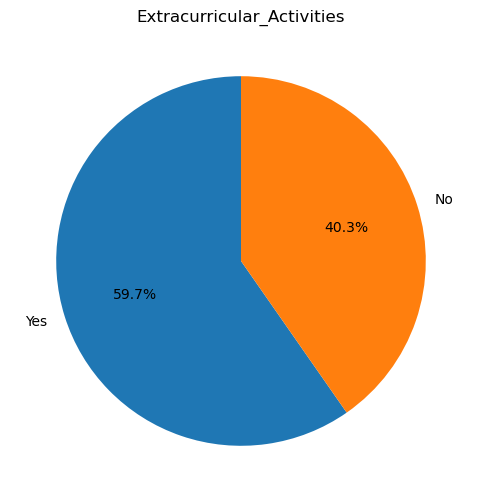

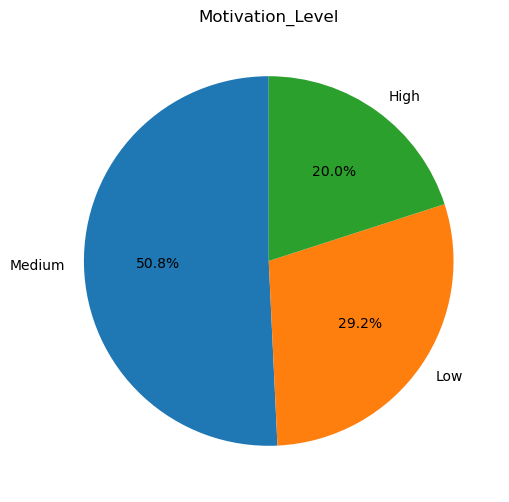

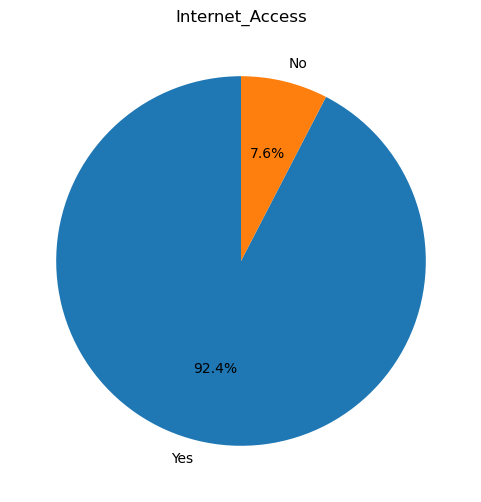

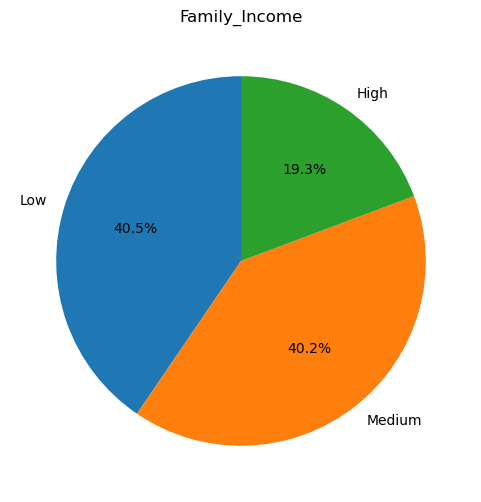

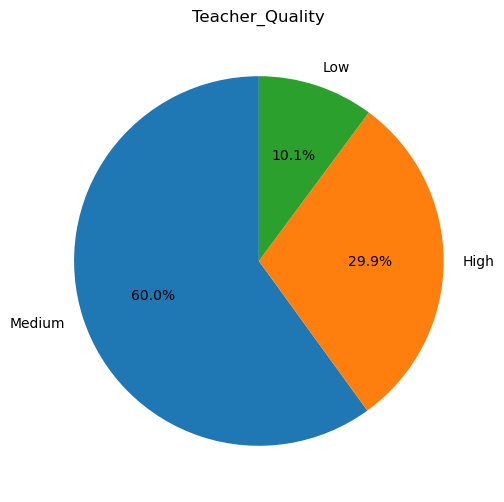

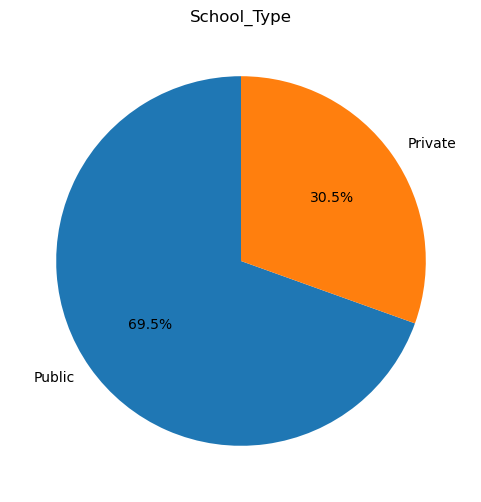

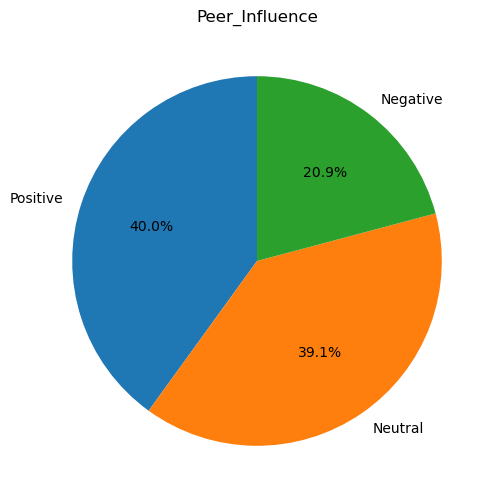

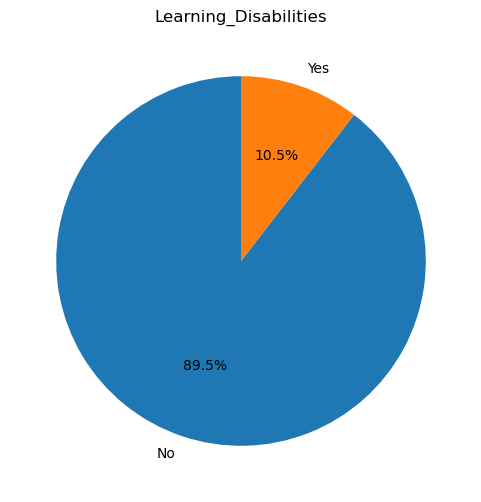

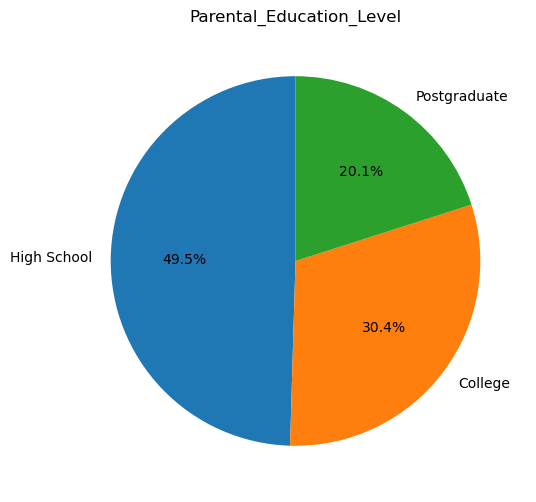

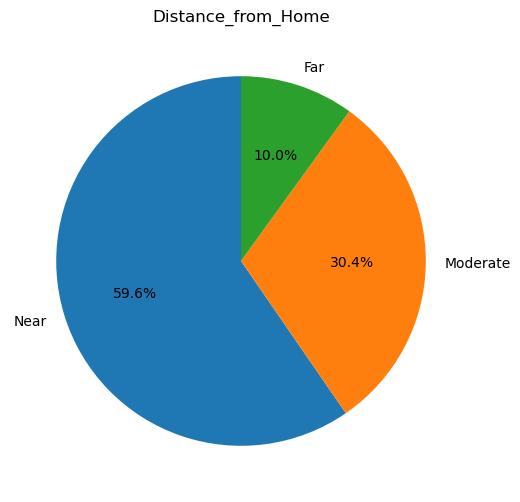

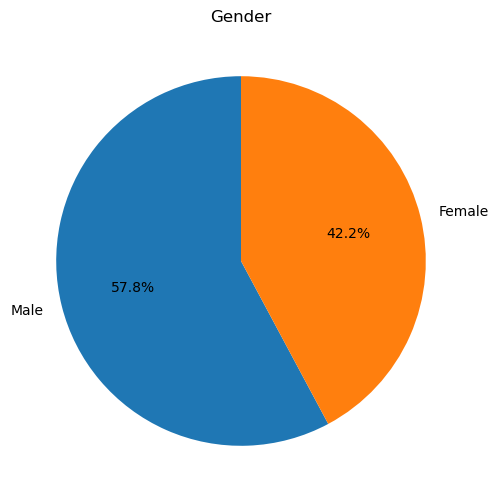

In [61]:
cat_df = df.select_dtypes(include=['object', 'category'])


for col in cat_df:
    counts = df[col].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=counts.index,  
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(col)
    plt.savefig(f"Pie_chart_{col}.png")
    plt.show()


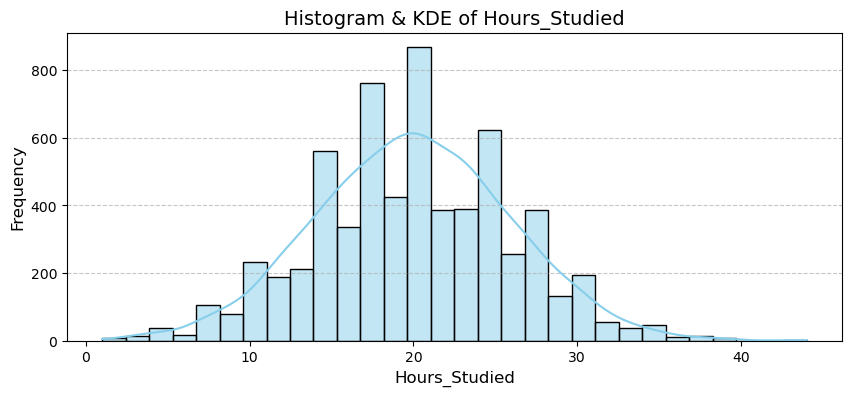

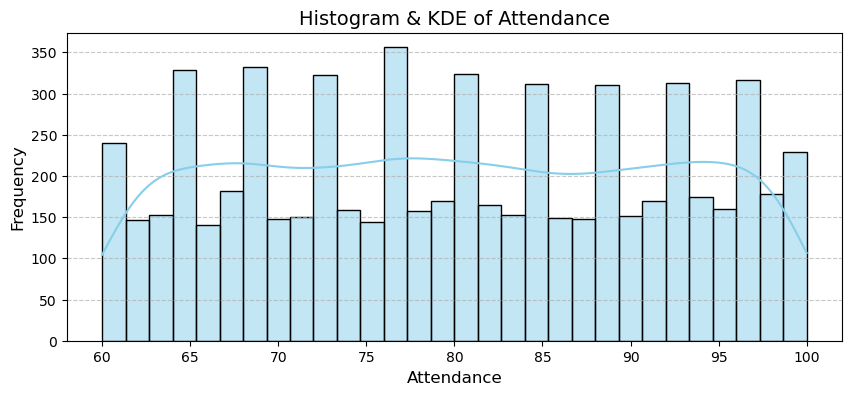

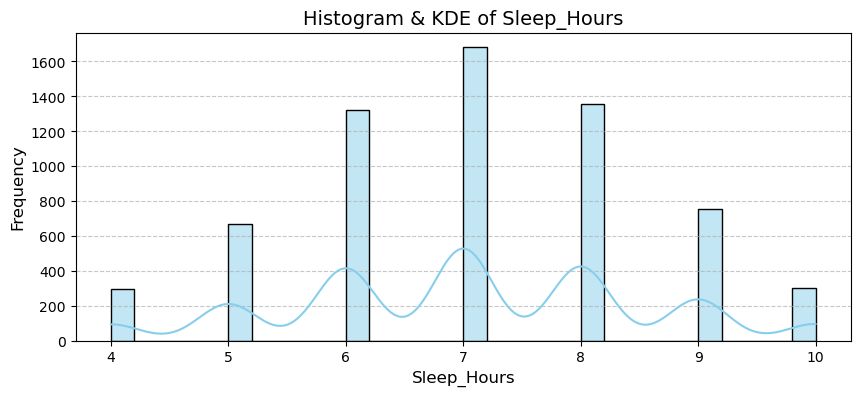

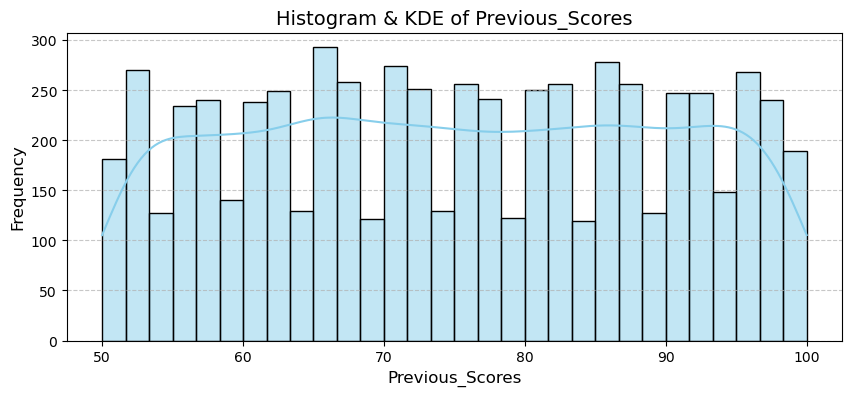

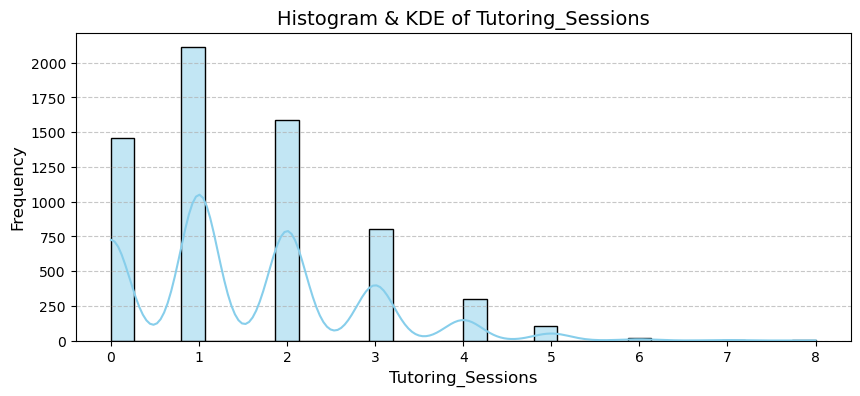

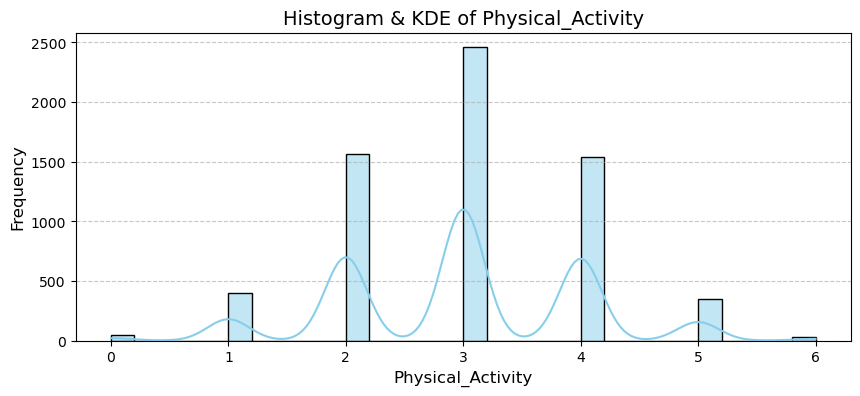

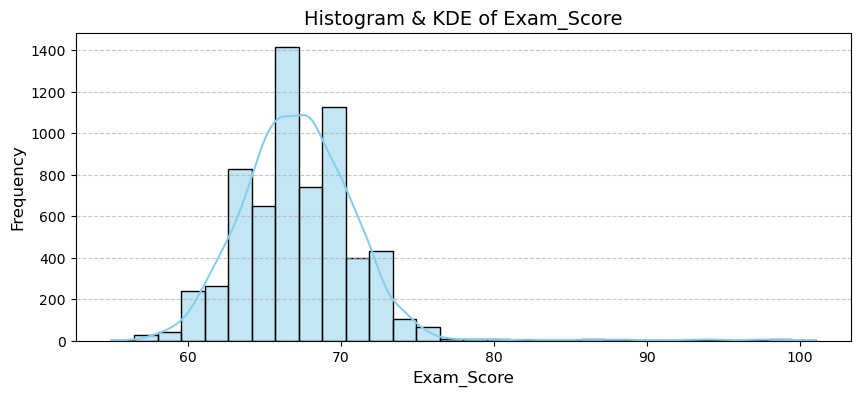

In [62]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Histogram & KDE of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.savefig(f'{col}_histogram')
    plt.show()


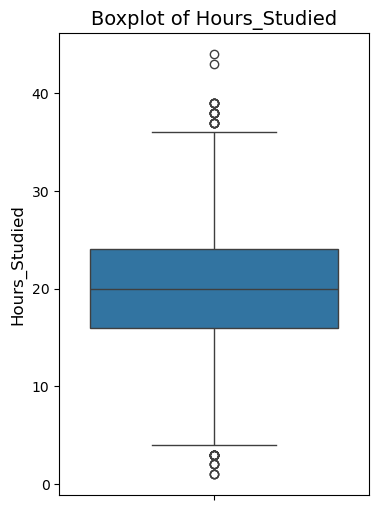

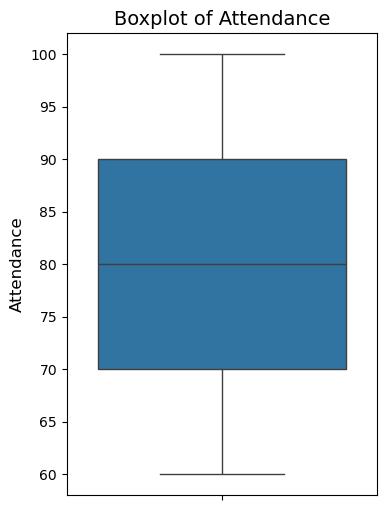

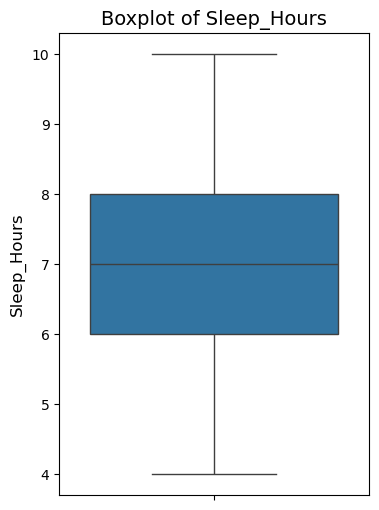

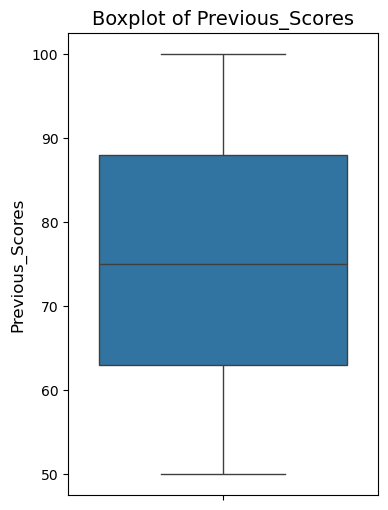

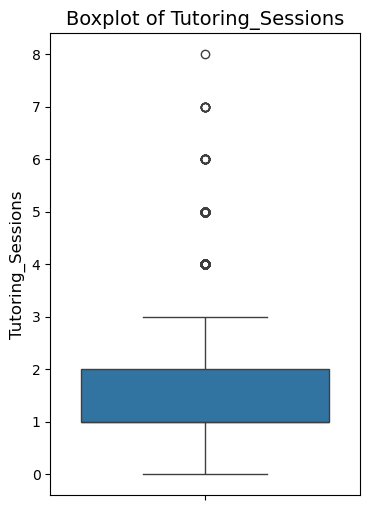

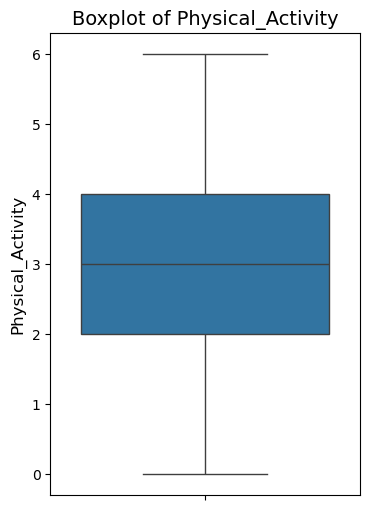

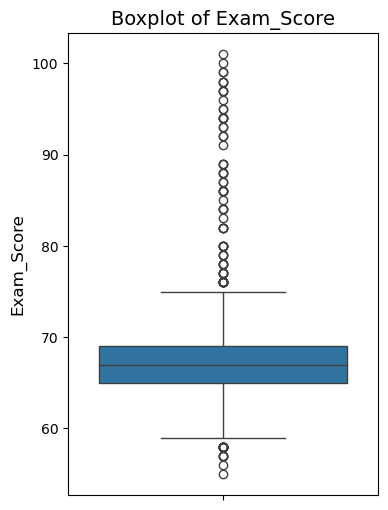

In [63]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.savefig(f'{col}_boxplot.png') 
    plt.show()

# Drop exam score greater than 100

In [65]:
df = df[df['Exam_Score'] <= 100]

# Calculate Average of exam score

In [67]:
mean_score = df['Exam_Score'].mean()

# values in categorical columns

In [69]:
cat_df = df.select_dtypes(include=['object', 'category'])

for col in cat_df:
    print(col , df[col].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low']
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate']
Distance_from_Home ['Near' 'Moderate' 'Far']
Gender ['Male' 'Female']


# Encoding

In [71]:
ordinal_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Distance_from_Home',
    'Parental_Education_Level', 'Peer_Influence'
]

ordinal_categories = [
    ['Low', 'Medium', 'High'],                
    ['Low', 'Medium', 'High'],               
    ['Low', 'Medium', 'High'],                 
    ['Low', 'Medium', 'High'],                 
    ['Low', 'Medium', 'High'],                
    ['Near', 'Moderate', 'Far'],               
    ['High School', 'College', 'Postgraduate'], 
    ['Negative', 'Neutral', 'Positive']       
]

binary_cols = [
    'Extracurricular_Activities', 'Internet_Access',
    'Learning_Disabilities', 'School_Type', 'Gender'
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

binary_map = {
    'No': 0, 'Yes': 1,
    'Public': 0, 'Private': 1,
    'Male': 0, 'Female': 1
}

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# Correlation Heatmap of Features

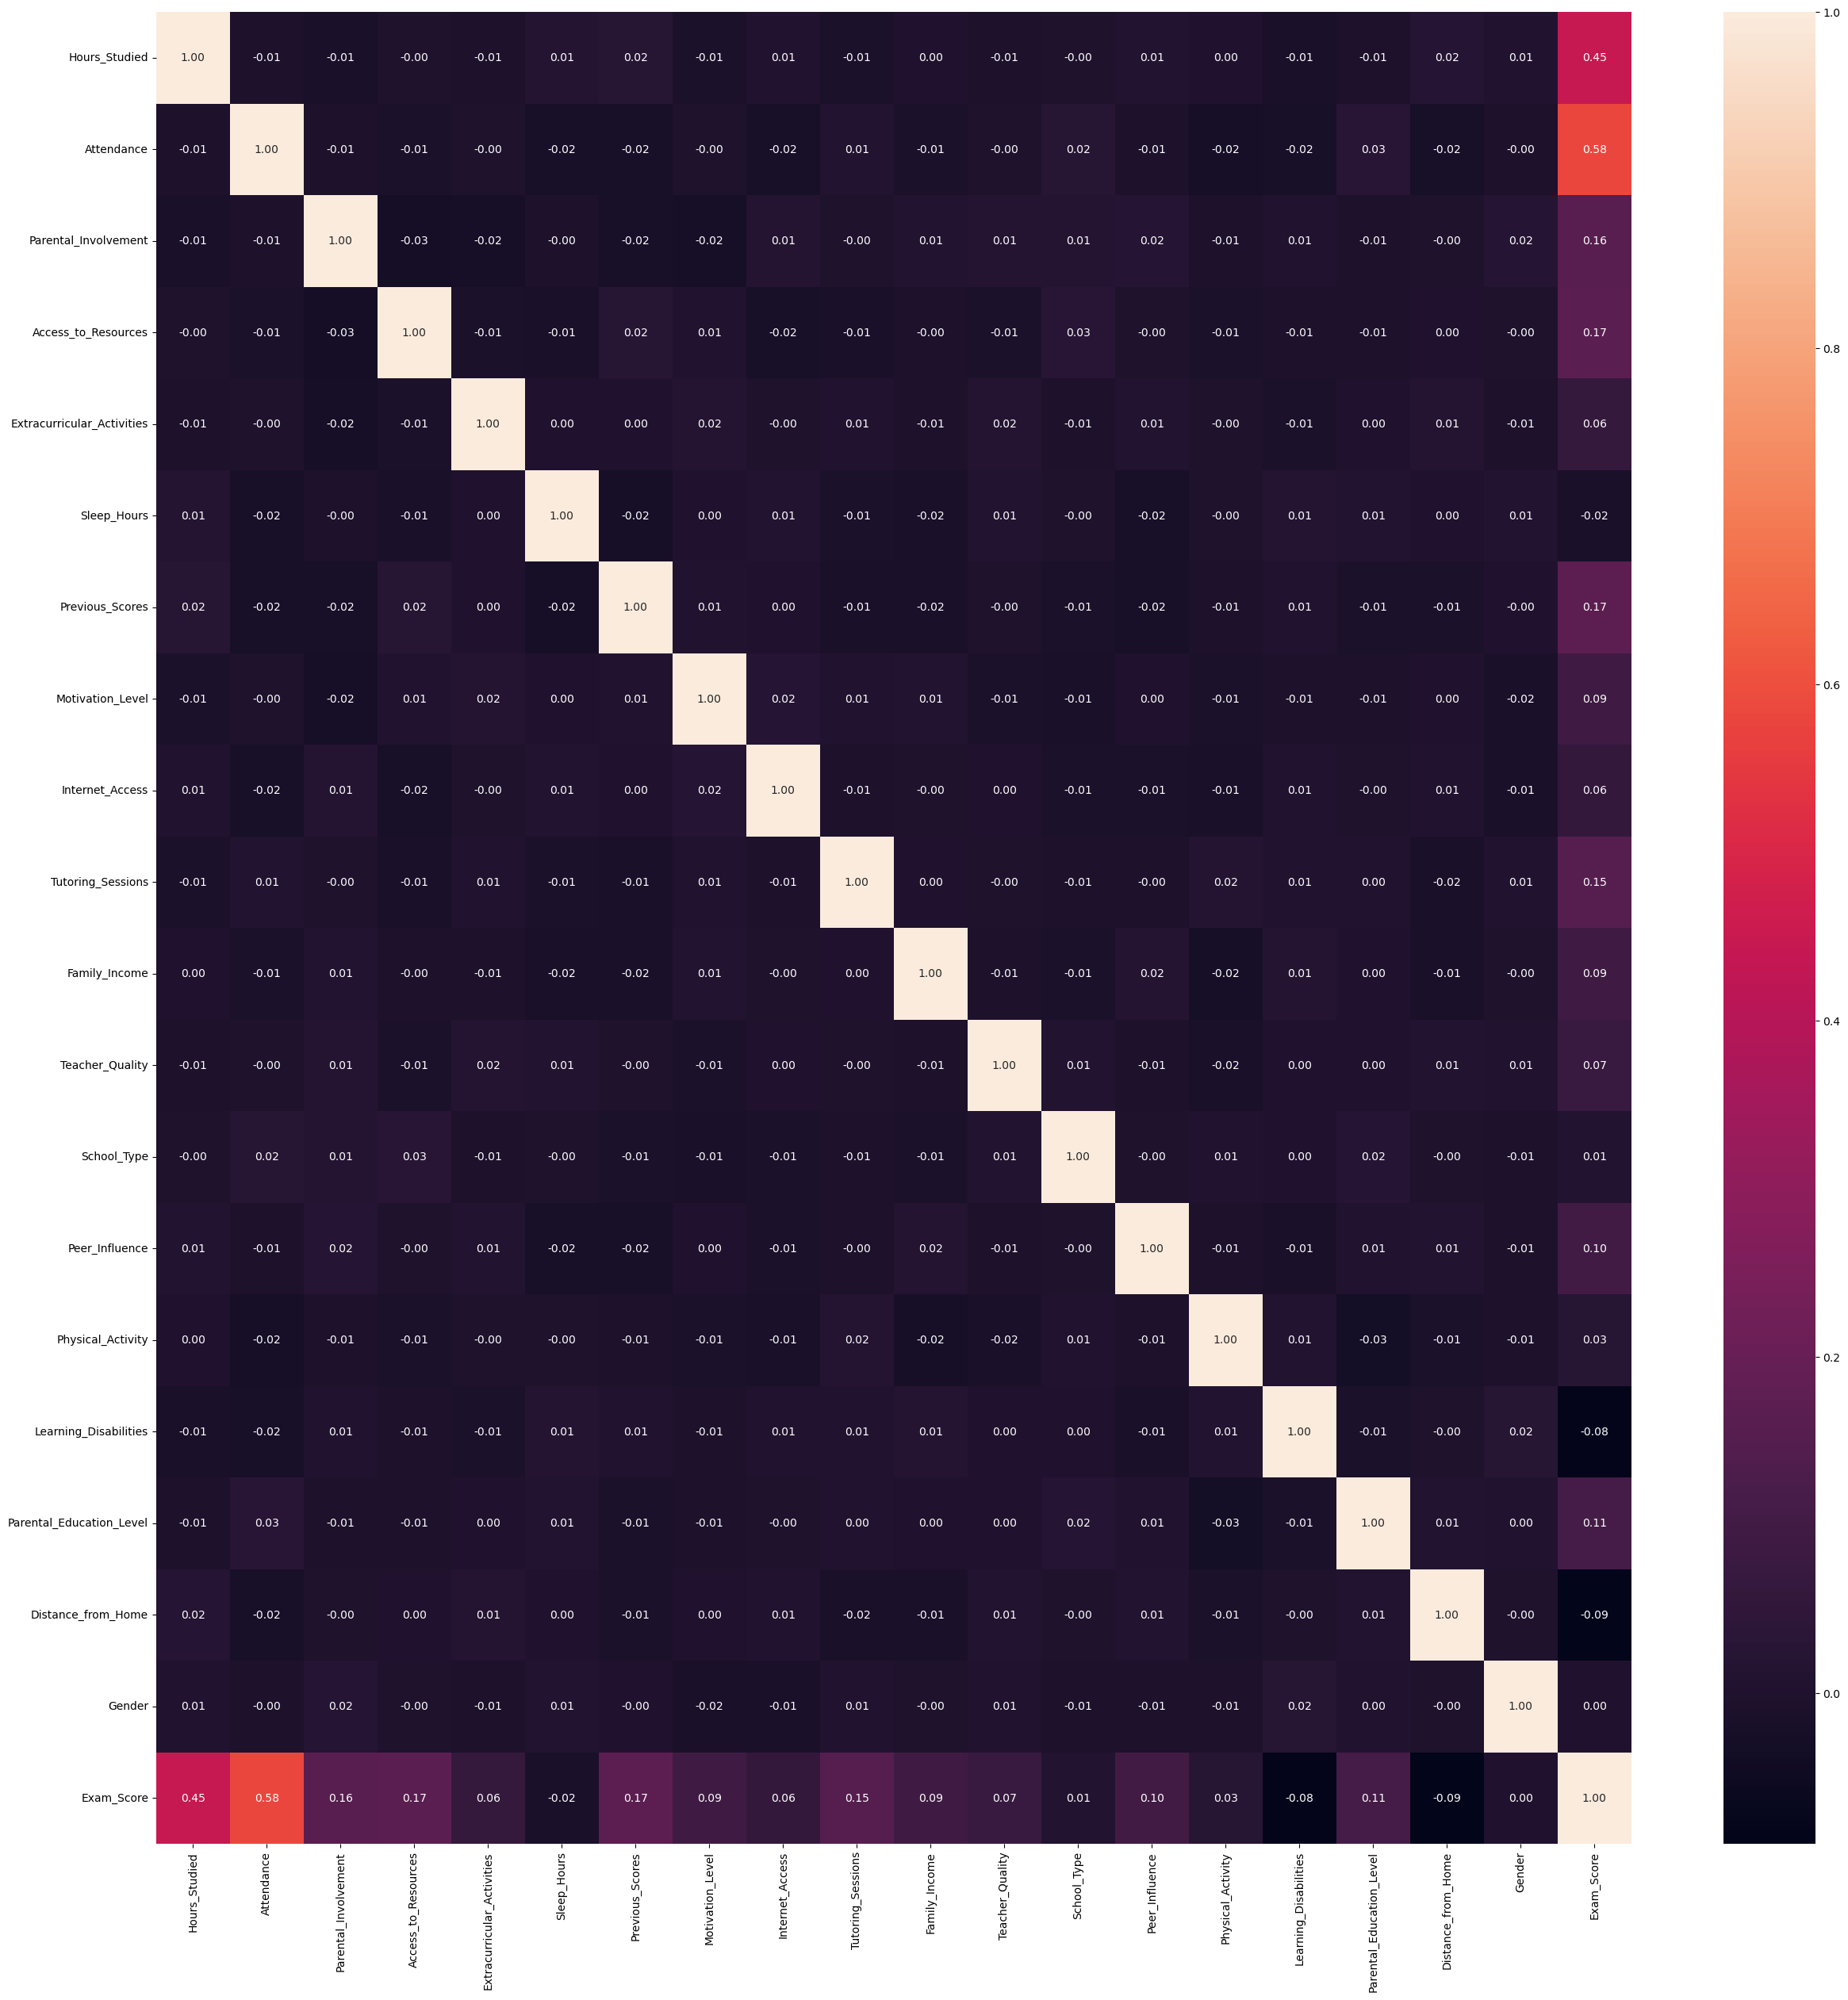

In [73]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr() , annot=True , fmt='.2f')
plt.savefig('heatmap.png')
plt.show()

# Drop Gender Column

In [75]:
df = df.drop('Gender', axis=1)

In [76]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score'],
      dtype='object')

# split data into features and target

In [78]:
x = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

# split data into train and test

In [80]:
x_train ,x_test ,y_train ,y_test =train_test_split( x , y ,test_size=0.25,random_state=42)

# Scaling Features Using StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [84]:
results_models=[]

# LinearRegression model

In [86]:

le = LinearRegression()

le.fit(x_train, y_train)


y_train_pred = le.predict(x_train)
y_test_pred = le.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred):.4f}")

cv_scores = cross_val_score(le, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_score) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_score) * 100

print(f"Train RMSE (% of mean Exam_score): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean Exam_score): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Linear Regression",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})


Train: 0.7189
Test : 0.7445
Cross-Validation Scores (5-Fold): [0.70258324 0.73793655 0.77352944 0.59254506 0.81293309]
Cross-Validation Accuracy (5-Fold): 0.7239
Train RMSE: 2.0616
Test  RMSE: 1.9708
Train RMSE (% of mean Exam_score): 3.07%
Test  RMSE (% of mean Exam_score): 2.93%


# PolynomialRegression model

In [88]:
poly_2 =PolynomialFeatures(degree=2)

x_train_poly=poly_2.fit_transform(x_train)
x_test_poly=poly_2.transform(x_test)

le2 = LinearRegression()

le2.fit(x_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
y_train_pred = le2.predict(x_train_poly)
print(f"train: {r2_score(y_train , y_train_pred):.4f}")
y_test_pred = le2.predict(x_test_poly)
print(f"test: {r2_score(y_test , y_test_pred):.4f}")

cv_scores = cross_val_score(le2, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_score) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_score) * 100

print(f"Train RMSE (% of mean Exam_Score): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean Exam_Score): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Polynomial Regression (deg=2)",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

train: 0.7305
test: 0.7340
Cross-Validation Scores (5-Fold): [0.70258324 0.73793655 0.77352944 0.59254506 0.81293309]
Cross-Validation Accuracy (5-Fold): 0.7239
Train RMSE: 2.0188
Test  RMSE: 2.0111
Train RMSE (% of mean Exam_Score): 3.00%
Test  RMSE (% of mean Exam_Score): 2.99%


# RandomForest model

In [91]:
rf = RandomForestRegressor(
  n_estimators=500,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=0
)

rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred):.4f}")

cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred))/ mean_score) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred))  / mean_score) * 100

print(f"Train RMSE (% of mean Exam_score): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean Exam_score): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Random Forest",
    "Train": r2_score(y_train, y_train_pred),
    "Test": r2_score(y_test, y_test_pred),
   "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

Train: 0.8239
Test : 0.6538
Cross-Validation Scores (5-Fold): [0.63571668 0.64255514 0.67078061 0.52965277 0.70538669]
Cross-Validation Accuracy (5-Fold): 0.6368
Train RMSE: 1.6317
Test  RMSE: 2.2943
Train RMSE (% of mean Exam_score): 2.43%
Test  RMSE (% of mean Exam_score): 3.41%


# DecisionTree model

In [100]:
dt = DecisionTreeRegressor(
    max_depth=5, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=0
)

dt.fit(x_train, y_train)

y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

print(f"Train: {r2_score(y_train, y_train_pred_dt):.4f}")
print(f"Test : {r2_score(y_test, y_test_pred_dt):.4f}")

cv_scores= cross_val_score(dt, x_train, y_train, cv=5, scoring='r2')
print("Cross-Validation Scores (5-Fold):", cv_scores)
print(f"Cross-Validation Accuracy (5-Fold): {cv_scores.mean():.4f}")

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_dt)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_dt)):.4f}")

train_rmse_percentage = ( np.sqrt(mean_squared_error(y_train, y_train_pred_dt))/ mean_score) * 100
test_rmse_percentage  = (np.sqrt(mean_squared_error(y_test, y_test_pred_dt))  / mean_score) * 100

print(f"Train RMSE (% of mean exam_score): {train_rmse_percentage:.2f}%")
print(f"Test  RMSE (% of mean exam_score): {test_rmse_percentage:.2f}%")

results_models.append({
    "Model": "Decision Tree",
    "Train": r2_score(y_train, y_train_pred_dt),
    "Test": r2_score(y_test, y_test_pred_dt),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    "Train RMSE (%)": train_rmse_percentage,
    "Test RMSE (%)": test_rmse_percentage
})

Train: 0.5532
Test : 0.5170
Cross-Validation Scores (5-Fold): [0.46287967 0.5089213  0.55899988 0.42881012 0.50928119]
Cross-Validation Accuracy (5-Fold): 0.4938
Train RMSE: 2.5992
Test  RMSE: 2.7098
Train RMSE (% of mean exam_score): 3.87%
Test  RMSE (% of mean exam_score): 4.03%


# Compare between models

In [102]:
df_models = pd.DataFrame(results_models)
print(df_models)

                           Model     Train      Test  Train RMSE  Test RMSE  \
0              Linear Regression  0.718920  0.744521    2.061647   1.970788   
1  Polynomial Regression (deg=2)  0.730469  0.733963    2.018848   2.011096   
2                  Random Forest  0.823940  0.653766    1.631658   2.294283   
3                  Decision Tree  0.553248  0.516980    2.599155   2.709845   
4                  Decision Tree  0.996253  0.254450    0.238039   3.366669   
5                  Decision Tree  0.553248  0.516980    2.599155   2.709845   

   Train RMSE (%)  Test RMSE (%)  
0        3.065791       2.930678  
1        3.002146       2.990618  
2        2.426372       3.411734  
3        3.865096       4.029700  
4        0.353979       5.006435  
5        3.865096       4.029700  


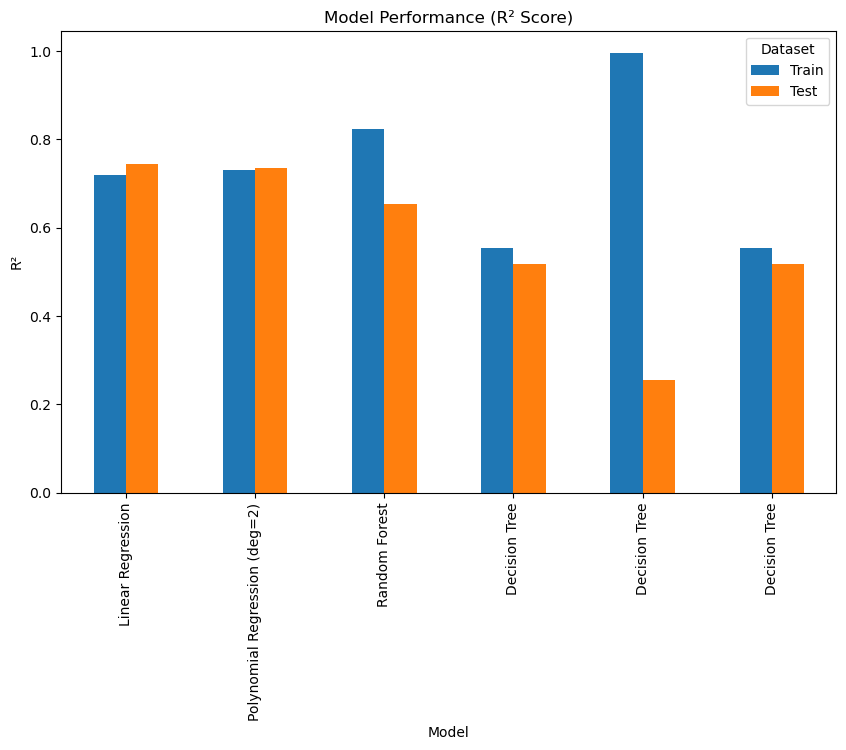

In [104]:
df_models.plot(
    x="Model",
    y=["Train", "Test"],
    kind="bar",
    figsize=(10,6)
)
plt.title("Model Performance (R² Score)")
plt.ylabel("R²")
plt.xticks(rotation=90)
plt.legend(title="Dataset")
plt.savefig("compare_between_models.png")
plt.show()

# Deployment

In [106]:
import joblib

joblib.dump(le,'model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(ordinal_encoder, "ordinal_encoder.pkl")

['ordinal_encoder.pkl']